In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from datetime import datetime
plt.rcParams['figure.figsize']=(15,9)


In [2]:
#function for formatting date time according to convenience
class date_format():
    def __init__(self,date):
#         date = ' '.join(date.split(' ')[:-1])       

        self.date_strip = datetime.strptime(date, '%m/%d/%Y %I:%M:%S %p')
    
    def is_weekday(self):
        if self.date_strip.weekday() ==5 or self.date_strip.weekday() == 6:
            return 0
        else:
            return 1
    def hour(self):
        return self.date_strip.hour
    
    def minute(self):
        return self.date_strip.minute

In [3]:
#Read the data 
raw_data  = pd.read_csv("orders.csv")

In [4]:
print('the shape of the data is ',raw_data.shape)
raw_data.head()


the shape of the data is  (16480, 8)


,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van


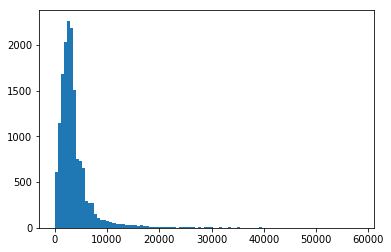

In [5]:
plt.hist((raw_data['Response Distance'].dropna()),bins=100);

In [6]:
print('The percentage of Data with null  Response data and has been removed is ',(raw_data['Response Distance'].shape[0]- raw_data['Response Distance'].dropna().shape[0])/raw_data['Response Distance'].shape[0] *100)

The percentage of Data with null  Response data and has been removed is  5.594660194174757


In [7]:
#Removing the data with Null Response Data
deleted_raw_data = raw_data.copy()
deleted_raw_data=deleted_raw_data.loc[deleted_raw_data['Response Distance'].dropna(axis=0).index]
#converting van and motorcycle categorical values into binary values
deleted_raw_data=pd.concat((deleted_raw_data,pd.get_dummies(deleted_raw_data['Service Type'])),axis=1)

In [8]:
#splitting the data on the basis of Reject Time and Cancel Time and Converted trip data
# Cancel Time data reflects when the user has cancelled
# Reject Time data reflects when the driver has rejected
#Converted Trips are the ones which has finally been converted into a trip
cancelled_time_data =deleted_raw_data.loc[deleted_raw_data['Cancel Time'].dropna().index]
reject_time_data = deleted_raw_data.loc[deleted_raw_data['Reject Time'].dropna().index]
cancel_trip_index=set(list(cancelled_time_data.index) + list(reject_time_data.index))
converted_trips=deleted_raw_data.loc[[index for index in deleted_raw_data.index if index not in cancel_trip_index]]

In [9]:
print('The shape of the cancelled_time_data,reject_time_data and converted_trips are as follows {},{},{}'.format(cancelled_time_data.shape,reject_time_data.shape,converted_trips.shape))

The shape of the cancelled_time_data,reject_time_data and converted_trips are as follows (1242, 10),(618, 10),(13698, 10)


In [10]:
# preprocessing and converting Cancel Time , Placed Time and Reject Time into date time format and calculating time and time span differences across
cancelled_time_data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van
8,13,6/8/2018 8:28:04 AM,9,6/8/2018 8:26:34 AM,NaN,9835.0,6/8/2018 8:27:33 AM,Van,0,1
13,92,6/8/2018 8:37:35 AM,14,6/8/2018 8:37:15 AM,NaN,2731.0,6/8/2018 8:37:22 AM,Van,0,1
28,114,6/8/2018 9:15:32 AM,29,6/8/2018 9:13:42 AM,NaN,557.0,6/8/2018 9:13:51 AM,Van,0,1
34,39,6/8/2018 9:35:01 AM,35,6/8/2018 9:34:03 AM,NaN,6411.0,6/8/2018 9:34:53 AM,Van,0,1
45,118,6/8/2018 10:03:02 AM,46,6/8/2018 10:02:07 AM,NaN,949.0,6/8/2018 10:02:15 AM,Van,0,1


In [11]:
reject_time_data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van
93,208,NaN,94,6/8/2018 11:19:23 AM,6/11/2018 5:50:41 PM,1800.0,6/8/2018 11:19:45 AM,Van,0,1
186,11,NaN,187,6/8/2018 2:19:13 PM,6/8/2018 3:31:21 PM,4039.0,6/8/2018 2:19:33 PM,Van,0,1
189,19,NaN,190,6/8/2018 2:20:26 PM,6/9/2018 9:54:03 AM,3144.0,6/8/2018 2:20:47 PM,Motorcycle,1,0
225,94,NaN,226,6/8/2018 3:29:08 PM,6/9/2018 3:05:40 PM,2928.0,6/8/2018 3:29:16 PM,Van,0,1
367,92,NaN,368,6/9/2018 7:16:03 AM,6/12/2018 2:45:13 PM,2926.0,6/9/2018 7:16:15 AM,Van,0,1


In [12]:
converted_trips.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van,0,1
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van,0,1
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van,0,1
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van,0,1
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van,0,1


## TRANSFORMING VARIOUS FIELDS OF THE DATA INTO DEFINED FORMS FOR DATA MODELLING

In [13]:
# preprocessing and converting Cancel Time , Placed Time and Reject Time into date time format and calculating time and time span differences across
# for the customer cancelled trip data
cancelled_time_data['Response in(secs)'] = cancelled_time_data['Response Time'].apply(lambda date : date_format(date).date_strip)  - cancelled_time_data['Placed Time'].apply(lambda date : date_format(date).date_strip)
cancelled_time_data['Cancel in(secs)'] = cancelled_time_data['Cancel Time'].apply(lambda date : date_format(date).date_strip)  - cancelled_time_data['Placed Time'].apply(lambda date : date_format(date).date_strip)

#for the driver rejected trip data
reject_time_data['Response in(secs)'] = reject_time_data['Response Time'].apply(lambda date : date_format(date).date_strip)  - reject_time_data['Placed Time'].apply(lambda date : date_format(date).date_strip)
reject_time_data['Cancel in(secs)'] = reject_time_data['Reject Time'].apply(lambda date : date_format(date).date_strip)  - reject_time_data['Placed Time'].apply(lambda date : date_format(date).date_strip)

#for the converted trips data
converted_trips['Response in(secs)'] = converted_trips['Response Time'].apply(lambda date : date_format(date).date_strip)  - converted_trips['Placed Time'].apply(lambda date : date_format(date).date_strip)

#Converting the time differences in secs
cancelled_time_data["Response in(secs)"] = cancelled_time_data["Response in(secs)"].apply(lambda time: time.seconds)
cancelled_time_data["Cancel in(secs)"] = cancelled_time_data["Cancel in(secs)"].apply(lambda time: time.seconds)

reject_time_data["Response in(secs)"] = reject_time_data["Response in(secs)"].apply(lambda time: time.seconds)
reject_time_data["Cancel in(secs)"] = reject_time_data["Cancel in(secs)"].apply(lambda time: time.seconds)

converted_trips["Response in(secs)"] = converted_trips["Response in(secs)"].apply(lambda time: time.seconds)

#Converted Placed Time into Placed Hour
cancelled_time_data['Placed Hour']=cancelled_time_data['Placed Time'].apply(lambda time:date_format(time).hour())
reject_time_data['Placed Hour']=reject_time_data['Placed Time'].apply(lambda time:date_format(time).hour())
converted_trips['Placed Hour']=converted_trips['Placed Time'].apply(lambda time:date_format(time).hour())


#Converting Placed Time into Weekday/Weekend field

cancelled_time_data['Weekday/Weekend']=cancelled_time_data['Placed Time'].apply(lambda time:date_format(time).is_weekday())
reject_time_data['Weekday/Weekend']=reject_time_data['Placed Time'].apply(lambda time:date_format(time).is_weekday())
converted_trips['Weekday/Weekend']=converted_trips['Placed Time'].apply(lambda time:date_format(time).is_weekday())

#Calculating The Driver Reaction Time a new feature( time in seconds each driver took to respond once the user placed request)

converted_trips['Driver Reaction Time'] = converted_trips['Response in(secs)']/converted_trips['Available Drivers']#*converted_trips['Hours']#*converted_trips['Response Distance']
cancelled_time_data['Driver Reaction Time'] = cancelled_time_data['Response in(secs)']/cancelled_time_data['Available Drivers']#*cancelled_time_data['Hours'] #* cancelled_time_data['Response Distance']
reject_time_data['Driver Reaction Time'] = reject_time_data['Response in(secs)']/reject_time_data['Available Drivers']#*reject_time_data['Hours'] #* reject_time_data['Response Distance']
# cancelled_time_data['Driver Reaction Time']=cancelled_time_data['Driver Reaction Time'].apply(lambda time:time.seconds)
# reject_time_data['Driver Reaction Time']=reject_time_data['Driver Reaction Time'].apply(lambda time:time.seconds)
# converted_trips['Driver Reaction Time']=converted_trips['Driver Reaction Time'].apply(lambda time:time.seconds)

In [14]:
converted_trips.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van,Response in(secs),Placed Hour,Weekday/Weekend,Driver Reaction Time
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van,0,1,24,8,1,0.615385
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van,0,1,33,8,1,0.485294
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van,0,1,26,8,1,2.600000
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van,0,1,9,8,1,0.118421
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van,0,1,21,8,1,0.214286


In [43]:
columns_to_drop = ['Cancel Time','Placed Time','Order ID','Reject Time','Response Time','Service Type']
cancelled_time_data.drop(columns_to_drop,axis=1,inplace=True)
reject_time_data.drop(columns_to_drop,axis=1,inplace=True)
converted_trips.drop(columns_to_drop,axis=1,inplace=True)

Text(0,0.5,'Number of Drivers')

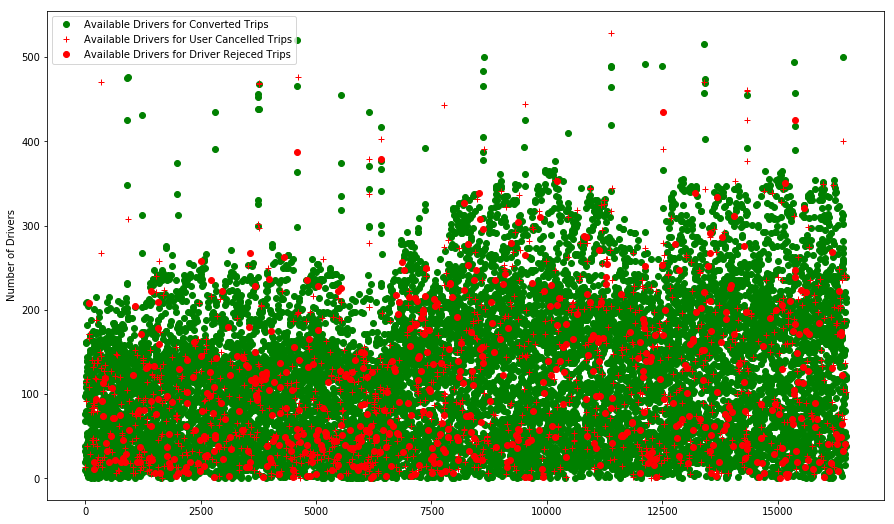

In [21]:
plt.plot(converted_trips["Available Drivers"],'go',label="Available Drivers for Converted Trips")
plt.plot(cancelled_time_data["Available Drivers"],'r+',label = "Available Drivers for User Cancelled Trips")
plt.plot(reject_time_data["Available Drivers"],'ro',label= "Available Drivers for Driver Rejeced Trips")
plt.legend()
plt.ylabel("Number of Drivers")
#clearly shows we just cant have a feature based on available drivers for predicting the probability

In [27]:
cancelled_time_data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van,Response in(secs),Cancel in(secs),Placed Hour,Weekday/Weekend,Driver Reaction Time
8,13,6/8/2018 8:28:04 AM,9,6/8/2018 8:26:34 AM,NaN,9835.0,6/8/2018 8:27:33 AM,Van,0,1,59,90,8,1,4.538462
13,92,6/8/2018 8:37:35 AM,14,6/8/2018 8:37:15 AM,NaN,2731.0,6/8/2018 8:37:22 AM,Van,0,1,7,20,8,1,0.076087
28,114,6/8/2018 9:15:32 AM,29,6/8/2018 9:13:42 AM,NaN,557.0,6/8/2018 9:13:51 AM,Van,0,1,9,110,9,1,0.078947
34,39,6/8/2018 9:35:01 AM,35,6/8/2018 9:34:03 AM,NaN,6411.0,6/8/2018 9:34:53 AM,Van,0,1,50,58,9,1,1.282051
45,118,6/8/2018 10:03:02 AM,46,6/8/2018 10:02:07 AM,NaN,949.0,6/8/2018 10:02:15 AM,Van,0,1,8,55,10,1,0.067797


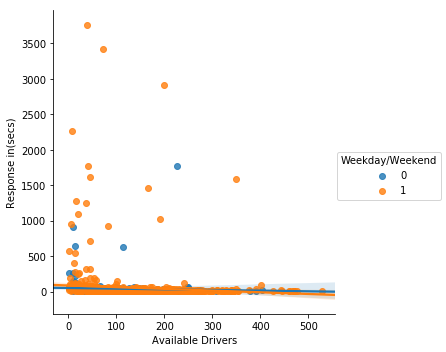

In [28]:
sns.lmplot(x="Available Drivers",y="Response in(secs)",hue="Weekday/Weekend",data=cancelled_time_data)

In [261]:
cancelled_time_data['Response Time'].replace(np.nan,0,inplace=True)

# cancelled_time_data['Response Time'].loc[index]  = cancelled_time_data['Placed Time'].loc[index]
cancelled_time_data['Response Time'].replace(0,cancelled_time_data['Placed Time'],inplace=True)

In [23]:
cancelled_time_data.head()
# cancelled_time_data.drop('Hour',axis=1,inplace=True)

,Available Drivers,Response Distance,Response in(secs),Cancel in(secs),Placed Hour,Driver Reaction Time
8,13,9835.0,59,90,8,4.538462
13,92,2731.0,7,20,8,0.076087
28,114,557.0,9,110,9,0.078947
34,39,6411.0,50,58,9,1.282051
45,118,949.0,8,55,10,0.067797


In [9]:
#weekday distribution of data
cancelled_time_data_weekday = cancelled_time_data[cancelled_time_data['Weekday/Weekend']==1]
#weekend distribution of data
cancelled_time_data_weekend= cancelled_time_data[cancelled_time_data['Weekday/Weekend']==0]

#weekday distribution of data
reject_time_data_weekday = reject_time_data[reject_time_data['Weekday/Weekend']==1]
#weekend distribution of data
reject_time_data_weekend= reject_time_data[reject_time_data['Weekday/Weekend']==0]

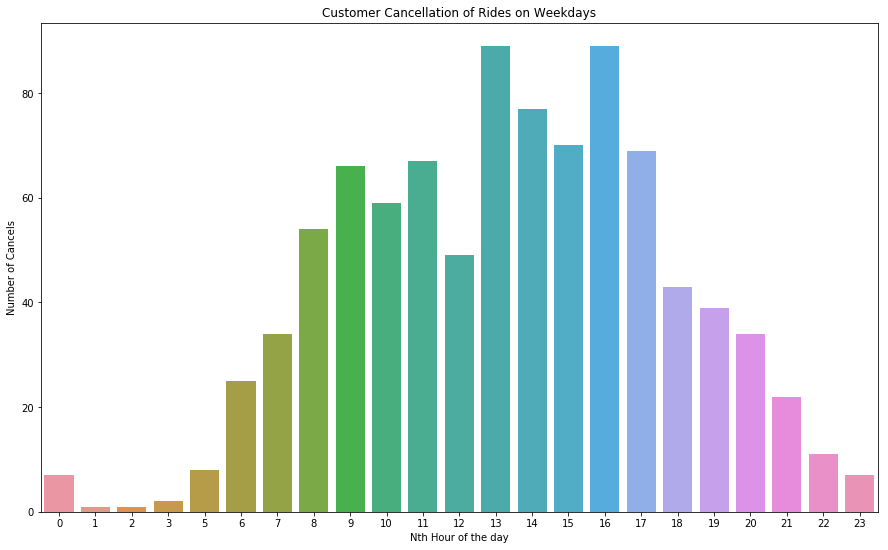

Text(0.5,0,'Nth Hour of the day')

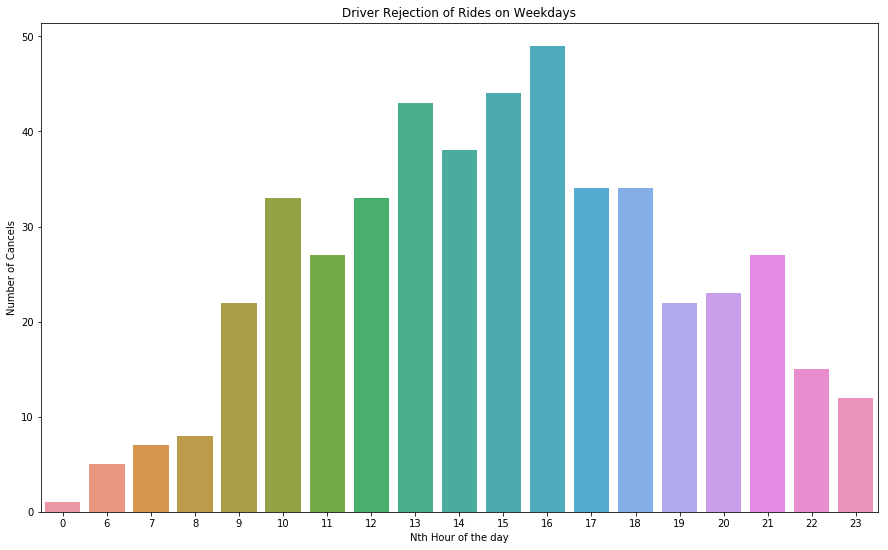

In [519]:
sns.barplot(cancelled_time_data_weekday['Cancel Hour'].value_counts().index,cancelled_time_data_weekday['Cancel Hour'].value_counts())
plt.title('Customer Cancellation of Rides on Weekdays')
plt.ylabel('Number of Cancels')
plt.xlabel('Nth Hour of the day')
plt.show()
sns.barplot(reject_time_data_weekday['Reject Hour'].value_counts().index,reject_time_data_weekday['Reject Hour'].value_counts())
plt.title('Driver Rejection of Rides on Weekdays')
plt.ylabel('Number of Cancels')
plt.xlabel('Nth Hour of the day')

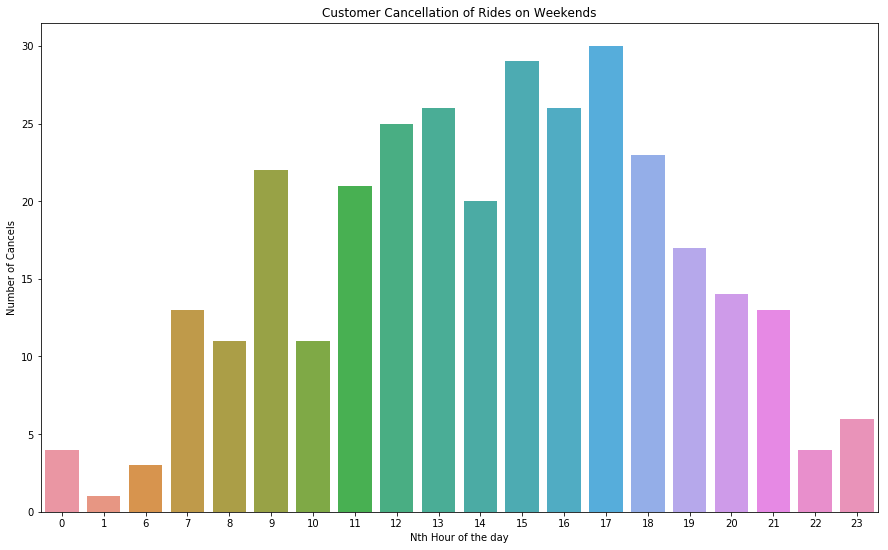

Text(0.5,0,'Nth Hour of the day')

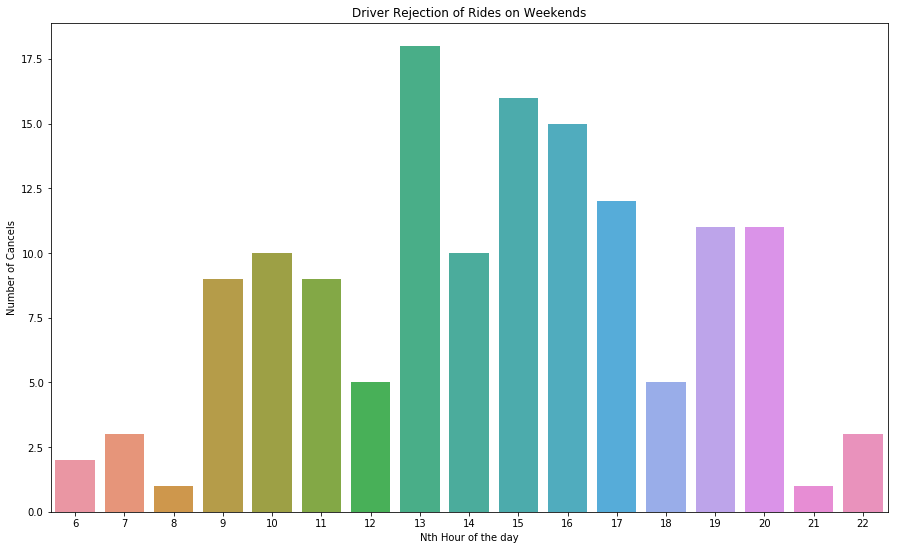

In [236]:
sns.barplot(cancelled_time_data_weekend['Cancel Hour'].value_counts().index,cancelled_time_data_weekend['Cancel Hour'].value_counts())
plt.title('Customer Cancellation of Rides on Weekends')
plt.ylabel('Number of Cancels')
plt.xlabel('Nth Hour of the day')
plt.show()
sns.barplot(reject_time_data_weekend['Reject Hour'].value_counts().index,reject_time_data_weekend['Reject Hour'].value_counts())
plt.title('Driver Rejection of Rides on Weekends')
plt.ylabel('Number of Cancels')
plt.xlabel('Nth Hour of the day')

### From 1 am to 5 am there is no Rejection of Rides either from Driver both weekdays/weekends
###  From 2am to 5 am there are no Rejections from Customer or Driver ( Late night parties over weekends may be)

In [108]:
print("Ratio of Vehicles Motorcycle:Van on weekdays for cancelled trips ",cancelled_time_data_weekday["Service Type"].value_counts()[1]/cancelled_time_data_weekday["Service Type"].value_counts()[0])
print("Ratio of Vehicles Motorcycle:Van on weekends for cancelled trips ",cancelled_time_data_weekend["Service Type"].value_counts()[1]/cancelled_time_data_weekend["Service Type"].value_counts()[0])
# Type of Vehicle has no impact on a Weekday to Weekend basis for cancelled trips. Customer has no bias towards vehicle types

Ratio of Vehicles Motorcycle:Van on weekdays for cancelled trips  0.12150668286755771
Ratio of Vehicles Motorcycle:Van on weekends for cancelled trips  0.11929824561403508


Text(0,0.5,'Driver Responded in(secs)')

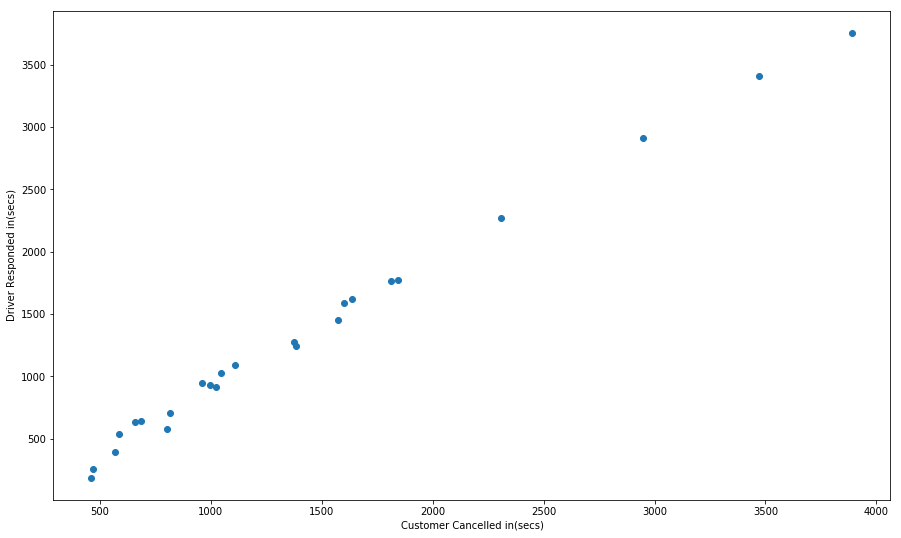

In [139]:
# filtered_without_zero=filtered_cancel_data[(filtered_cancel_data['Driver Responded in(secs)']!=0) & (filtered_without_zero['Customer Cancelled in(secs)']<30000)]
filtered_cancel_data_=filtered_cancel_data[filtered_cancel_data['Customer Cancelled in(secs)']>450].copy()
plot=plt.scatter(filtered_cancel_data_['Customer Cancelled in(secs)'],filtered_cancel_data_['Driver Responded in(secs)'])
plt.xlabel('Customer Cancelled in(secs)')
plt.ylabel('Driver Responded in(secs)')
# plt.axis([-100,500,0,500])
# plt.plot(y_line)

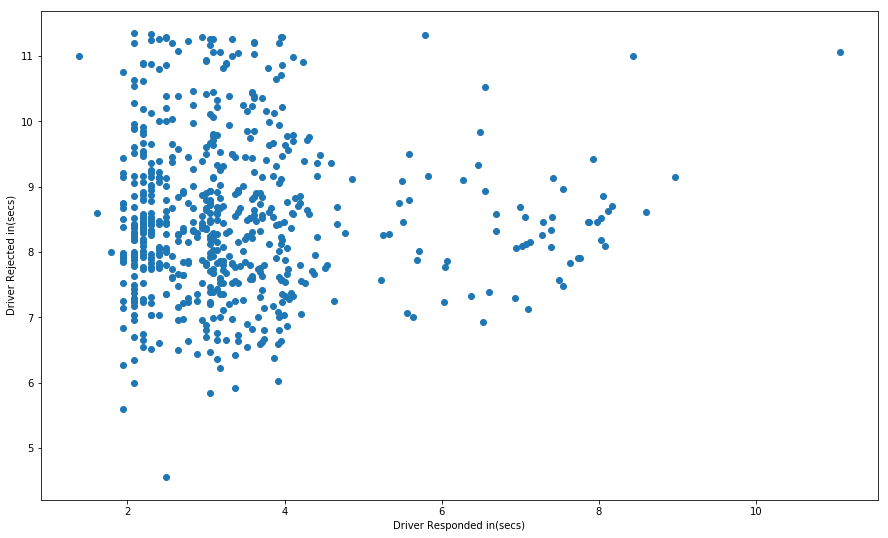

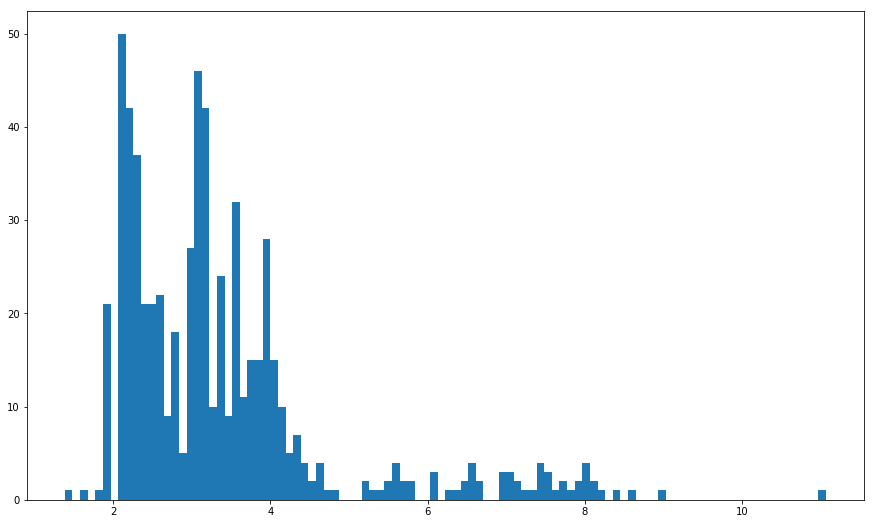

In [173]:
# filtered_reject_data_=filtered_reject_data[filtered_reject_data['Driver Rejected in(secs)']].copy()
plot=plt.scatter(np.log(filtered_reject_data['Driver Responded in(secs)']),np.log(filtered_reject_data['Driver Rejected in(secs)']))
plt.ylabel('Driver Rejected in(secs)')
plt.xlabel('Driver Responded in(secs)')
plt.show()
plt.hist(np.log(filtered_reject_data['Driver Responded in(secs)']),bins=100);

Text(0,0.5,'Driver Responded in(secs)')

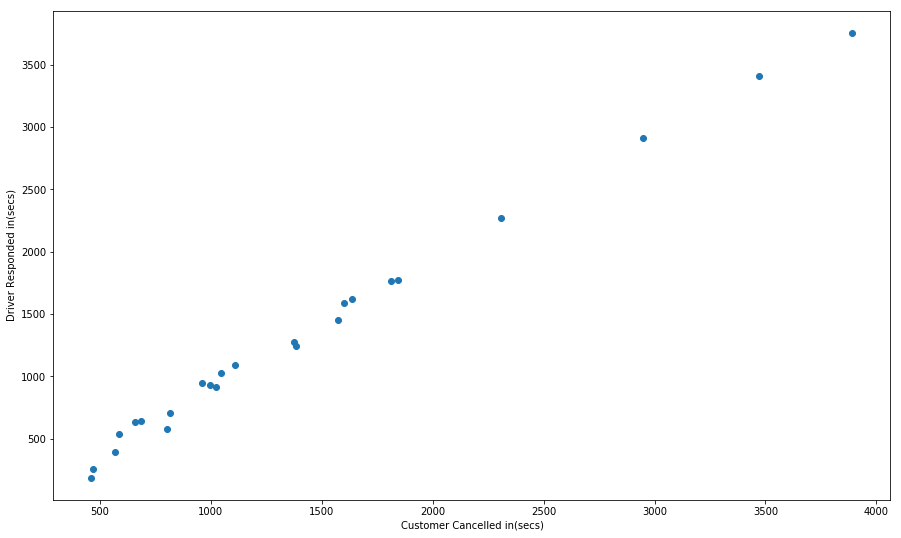

In [175]:
# filtered_without_zero=filtered_cancel_data[(filtered_cancel_data['Driver Responded in(secs)']!=0) & (filtered_without_zero['Customer Cancelled in(secs)']<30000)]
filtered_cancel_data_=filtered_cancel_data[filtered_cancel_data['Customer Cancelled in(secs)']>450].copy()
plot=plt.scatter(filtered_cancel_data_['Customer Cancelled in(secs)'],filtered_cancel_data_['Driver Responded in(secs)'])
plt.xlabel('Customer Cancelled in(secs)')
plt.ylabel('Driver Responded in(secs)')

In [116]:
print("Missing data for Response Time shapes to ",filtered_cancel_data[filtered_cancel_data['Driver Responded in(secs)']==0].shape[0])
#There is a linear relationship between Response Time and Cancelled time. This data can be used to predict the missing Response Time and fill the missing values

Missing data for Response Time shapes to  0


Text(0,0.5,'Driver Responded in(secs)')

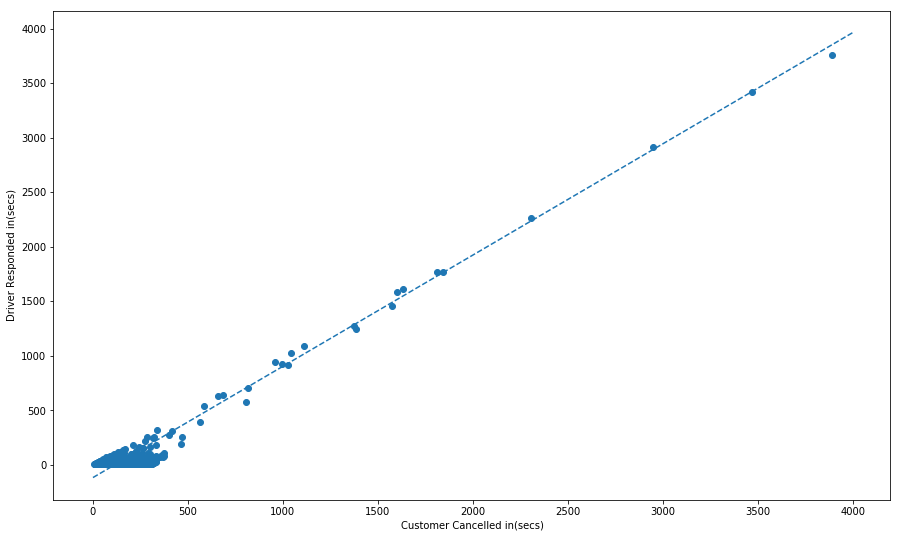

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

X= filtered_cancel_data_['Customer Cancelled in(secs)'];y=filtered_cancel_data_['Driver Responded in(secs)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
model =LinearRegression()
model.fit(X.values.reshape(-1,1),y)
x=list(range(4000))
y_line = model.intercept_ + model.coef_*x
plt.plot(y_line,ls='--')
plt.scatter(filtered_cancel_data['Customer Cancelled in(secs)'],filtered_cancel_data['Driver Responded in(secs)'])
plt.xlabel('Customer Cancelled in(secs)')
plt.ylabel('Driver Responded in(secs)')

In [377]:
predict_data=filtered_cancel_data[filtered_cancel_data['Driver Responded in(secs)']==0]
print(predict_data.shape)

(698, 6)


In [387]:
predicted_data=pd.DataFrame(model.predict(predict_data['Customer Cancelled in(secs)'].values.reshape(-1,1)),columns=['Driver Responded in(secs)'],index=predict_data.index)

In [390]:
filtered_cancel_data['Driver Responded in(secs)'].replace(0,predicted_data['Driver Responded in(secs)'],inplace=True)

C:\Users\Kazi\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [394]:
filtered_cancel_data=filtered_cancel_data[filtered_cancel_data['Driver Responded in(secs)']>=0]

In [395]:
filtered_cancel_data.head()

,Response Distance,Service Type,Driver Responded in(secs),Customer Cancelled in(secs),Weekday/Weekend,Hour
8,9835.0,Van,59.000000,90,1,8
13,2731.0,Van,7.000000,20,1,8
21,NaN,Van,220.545265,316,1,9
28,557.0,Van,9.000000,110,1,9
31,NaN,Van,567.184039,700,1,9


In [396]:
filtered_cancel_data.corr()

,Response Distance,Driver Responded in(secs),Customer Cancelled in(secs),Weekday/Weekend,Hour
Response Distance,1.000000,0.041879,0.089896,-0.021956,-0.009168
Driver Responded in(secs),0.041879,1.000000,0.890638,0.003086,-0.101600
Customer Cancelled in(secs),0.089896,0.890638,1.000000,-0.006458,-0.116371
Weekday/Weekend,-0.021956,0.003086,-0.006458,1.000000,-0.005977
Hour,-0.009168,-0.101600,-0.116371,-0.005977,1.000000


In [35]:
converted_trips['Service Type'].value_counts()

Van           12940
Motorcycle      758
Name: Service Type, dtype: int64

In [36]:
converted_trips.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van,Response in(secs),Placed Hour,Weekday/Weekend,Driver Reaction Time
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van,0,1,24,8,1,0.615385
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van,0,1,33,8,1,0.485294
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van,0,1,26,8,1,2.600000
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van,0,1,9,8,1,0.118421
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van,0,1,21,8,1,0.214286


In [194]:
converted_trips.drop(['Cancel Time','Order ID','Reject Time'],axis=1,inplace=True)

In [225]:
cancelled_freq.values

array([ 12.,  nan,  nan,  nan,  nan,  35.,  57.,  74., 119., 113., 124.,
       112., 176., 145., 159., 179., 145., 105.,  89.,  82.,  63.,  33.,
        25.])

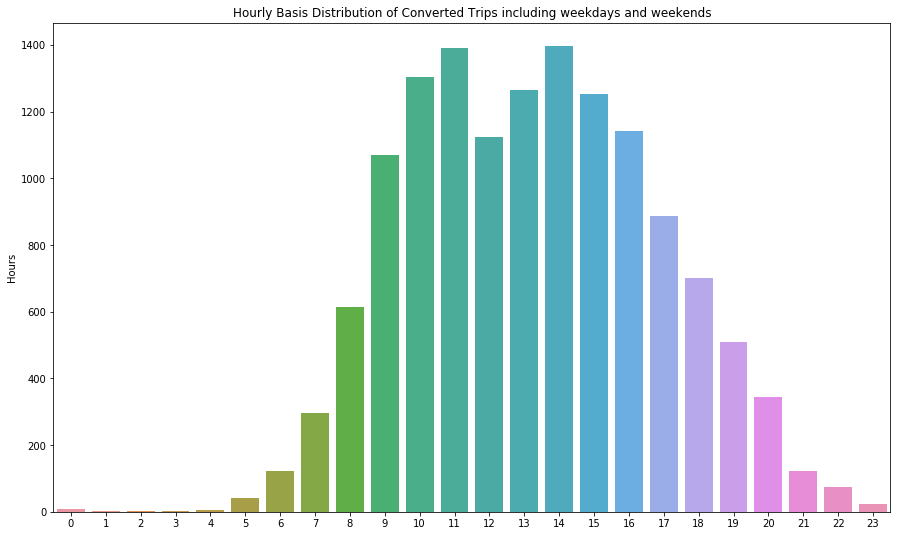

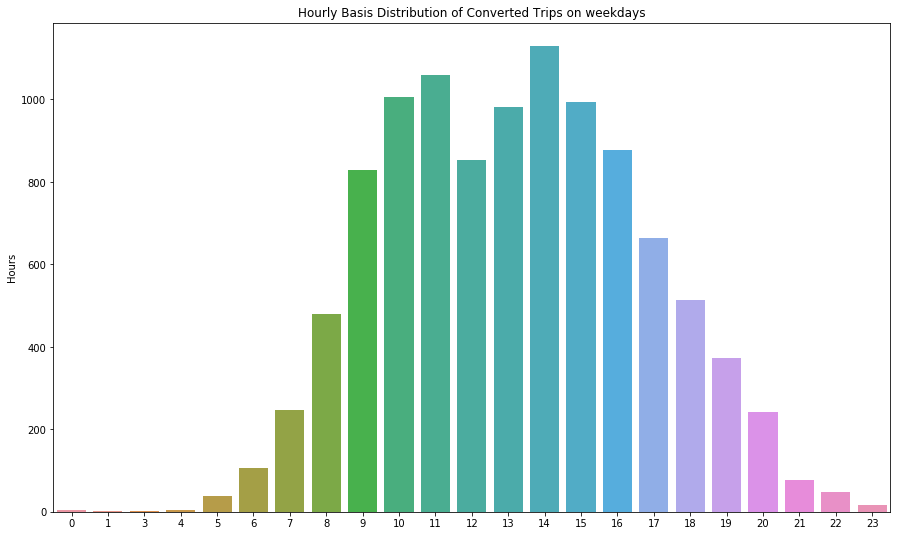

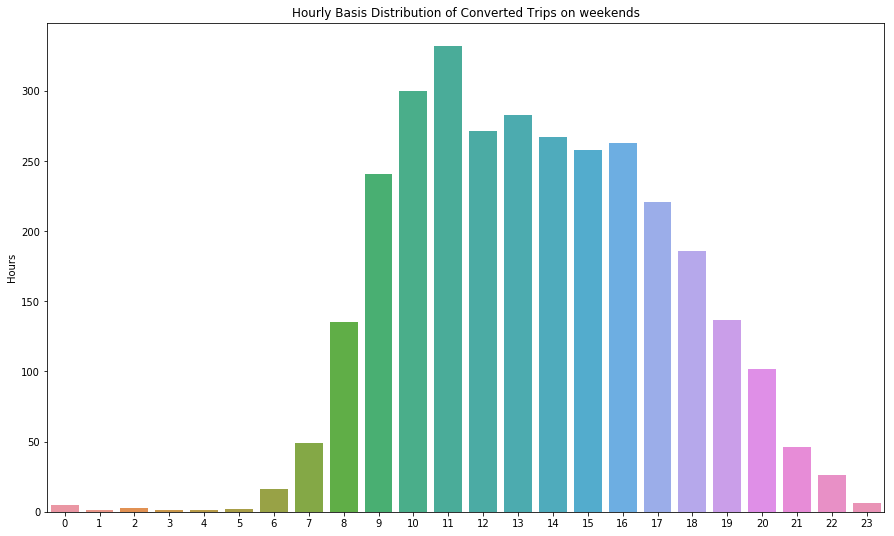

Text(0.5,1,'Hourly Basis Distribution of Cancelled Trips on weekends and weekdays')

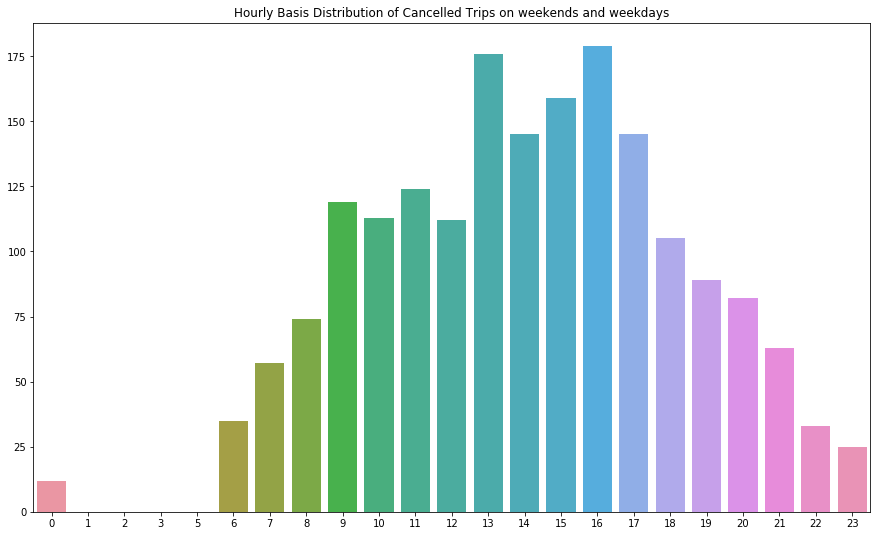

In [226]:
sns.barplot(converted_trips.Hours.value_counts().index,converted_trips.Hours.value_counts())
plt.title('Hourly Basis Distribution of Converted Trips including weekdays and weekends')
plt.show()
sns.barplot(converted_trips[converted_trips['Weekday/Weekend']==1].Hours.value_counts().index,converted_trips[converted_trips['Weekday/Weekend']==1].Hours.value_counts())
plt.title('Hourly Basis Distribution of Converted Trips on weekdays')
plt.show()
sns.barplot(converted_trips[converted_trips['Weekday/Weekend']==0].Hours.value_counts().index,converted_trips[converted_trips['Weekday/Weekend']==0].Hours.value_counts())
plt.title('Hourly Basis Distribution of Converted Trips on weekends')
plt.show()
cancelled_freq=cancelled_time_data['Cancel Hour'].value_counts() +reject_time_data['Reject Hour'].value_counts()
sns.barplot(cancelled_freq.index,cancelled_freq.values)
plt.title('Hourly Basis Distribution of Cancelled Trips on weekends and weekdays')

In [253]:
reject_time_data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Driver Responded in(secs),Driver Rejected in(secs),Weekday/Weekend,Reject Hour
93,208,NaN,94,6/8/2018 11:19:23 AM,6/11/2018 5:50:41 PM,1800.0,6/8/2018 11:19:45 AM,Van,00:00:22,3 days 06:31:18,1,17
186,11,NaN,187,6/8/2018 2:19:13 PM,6/8/2018 3:31:21 PM,4039.0,6/8/2018 2:19:33 PM,Van,00:00:20,0 days 01:12:08,1,15
189,19,NaN,190,6/8/2018 2:20:26 PM,6/9/2018 9:54:03 AM,3144.0,6/8/2018 2:20:47 PM,Motorcycle,00:00:21,0 days 19:33:37,0,9
225,94,NaN,226,6/8/2018 3:29:08 PM,6/9/2018 3:05:40 PM,2928.0,6/8/2018 3:29:16 PM,Van,00:00:08,0 days 23:36:32,0,15
367,92,NaN,368,6/9/2018 7:16:03 AM,6/12/2018 2:45:13 PM,2926.0,6/9/2018 7:16:15 AM,Van,00:00:12,3 days 07:29:10,1,14


In [249]:
cancelled_time_data['Driver Responded in(secs)'] = cancelled_time_data['Driver Responded in(secs)'].apply(lambda time:time.seconds)

In [254]:
reject_time_data['Driver Responded in(secs)'] = reject_time_data['Driver Responded in(secs)'].apply(lambda time:time.seconds)

In [260]:
reject_time_data['Driver Rejected in(secs)'] = reject_time_data['Driver Rejected in(secs)'].apply(lambda time:time.seconds)

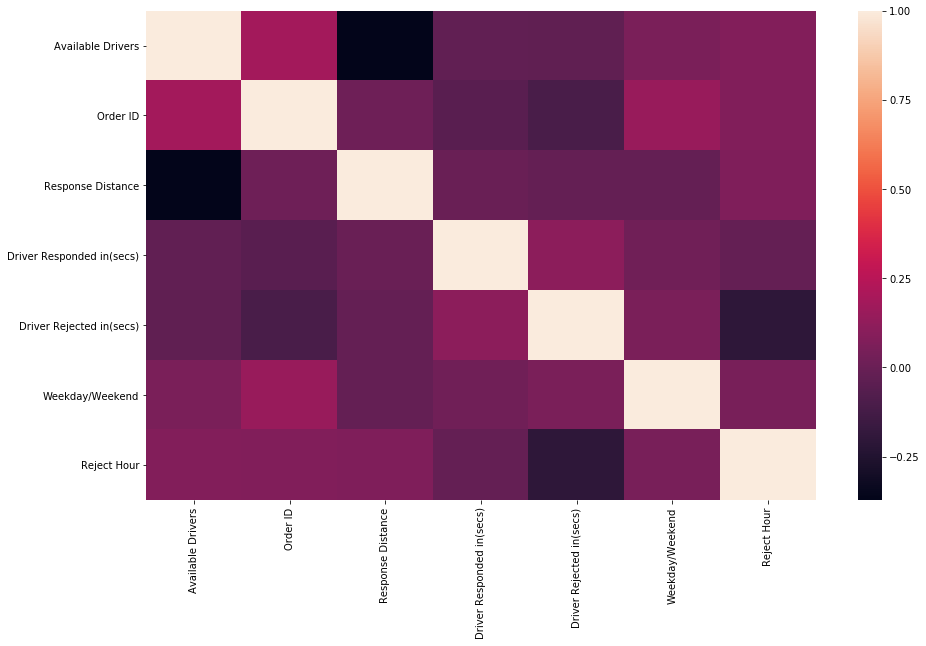

In [262]:
reject_time_data.head()
sns.heatmap(reject_time_data.corr())

In [38]:
converted_trips.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Motorcycle,Van,Response in(secs),Placed Hour,Weekday/Weekend,Driver Reaction Time
0,39,NaN,1,6/8/2018 8:01:22 AM,NaN,4615.0,6/8/2018 8:01:46 AM,Van,0,1,24,8,1,0.615385
1,68,NaN,2,6/8/2018 8:01:23 AM,NaN,4785.0,6/8/2018 8:01:56 AM,Van,0,1,33,8,1,0.485294
2,10,NaN,3,6/8/2018 8:06:39 AM,NaN,15964.0,6/8/2018 8:07:05 AM,Van,0,1,26,8,1,2.600000
3,76,NaN,4,6/8/2018 8:14:00 AM,NaN,2459.0,6/8/2018 8:14:09 AM,Van,0,1,9,8,1,0.118421
4,98,NaN,5,6/8/2018 8:16:00 AM,NaN,5510.0,6/8/2018 8:16:21 AM,Van,0,1,21,8,1,0.214286


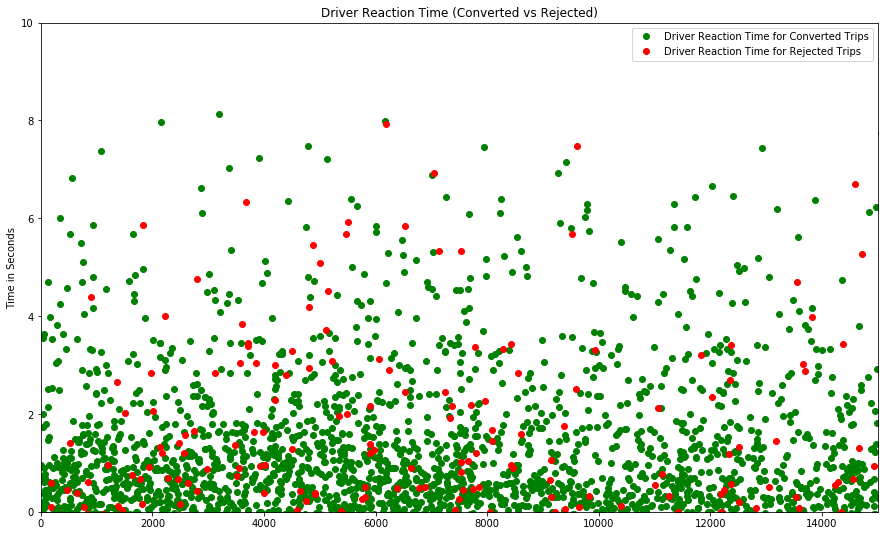

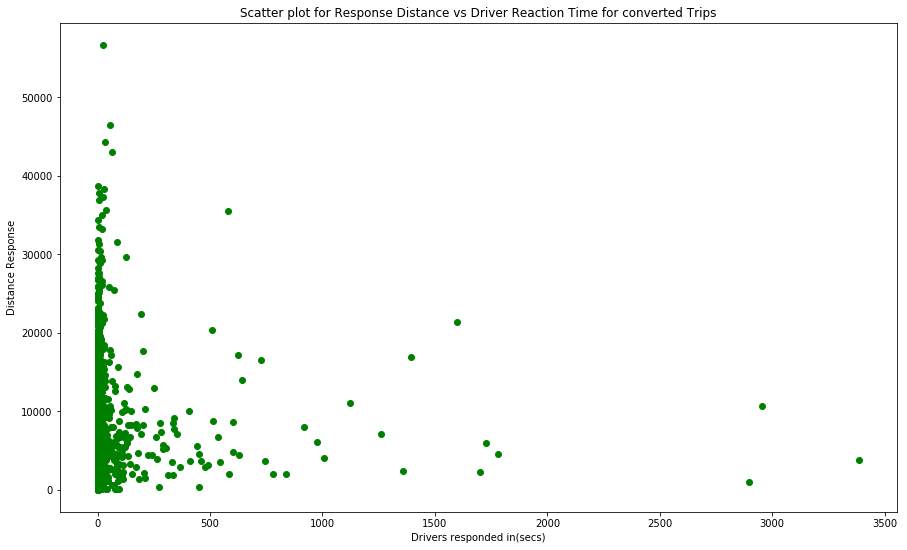

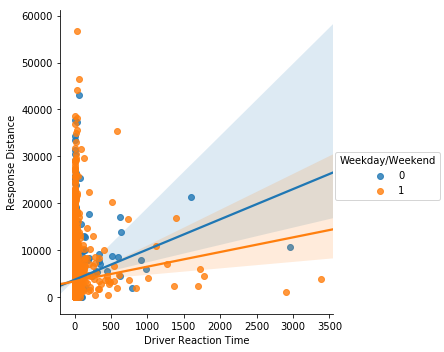

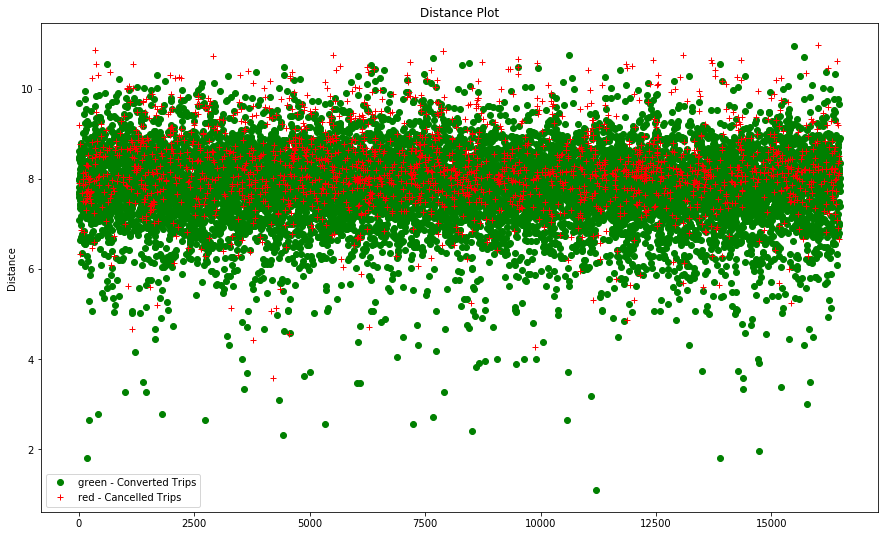

In [46]:
#we have already seen earlier some of the below features follows a non_gaussian distribution,
#by log transform we tend to bring them to a normal distribution 
#plotting the log normal values to find effective pattern separation data
# plt.plot(np.log(converted_trips['Driver Reaction Time']),'go')
# plt.plot(np.log(cancelled_time_data['Driver Reaction Time']),'ro')
# plt.axis([0,15000,0,10])
# plt.show()
plt.plot(np.log(converted_trips['Driver Reaction Time']),'go',label="Driver Reaction Time for Converted Trips")
plt.plot(np.log(reject_time_data['Driver Reaction Time']),'ro',label="Driver Reaction Time for Rejected Trips")
plt.axis([0,15000,0,10])
plt.title('Driver Reaction Time (Converted vs Rejected)')
plt.ylabel('Time in Seconds')
plt.legend()
plt.show()


plt.scatter(converted_trips['Driver Reaction Time'],converted_trips['Response Distance'],c="g")
plt.xlabel("Drivers responded in(secs)")
plt.ylabel('Distance Response')
plt.title("Scatter plot for Response Distance vs Driver Reaction Time for converted Trips")
# plt.legend(['green - Converted Trips','red - Cancelled Trips'])
plt.show()

# weekends have their own effect as is evident from the linear plot 
sns.lmplot(x='Driver Reaction Time',y='Response Distance',hue="Weekday/Weekend",data=converted_trips)
plt.show()


#proposing an idea to basically transform the dataset to higher dimensions for separation using SVM or using weak learners method
#xgboost or Random Forrest to distribute the data on entropy base.
#The above explorations provide the base towards the above ideas proposed
plt.plot(np.log(converted_trips['Response Distance']),'go')
plt.plot(np.log(cancelled_time_data['Response Distance']),'r+')
plt.plot(np.log(reject_time_data['Response Distance']),'r+')
plt.title('Distance Plot')
plt.ylabel('Distance')
plt.legend(['green - Converted Trips','red - Cancelled Trips'])

In [484]:
converted_weekdays=converted_trips[converted_trips["Weekday/Weekend"]==1]
converted_weekend=converted_trips[converted_trips["Weekday/Weekend"]==0]

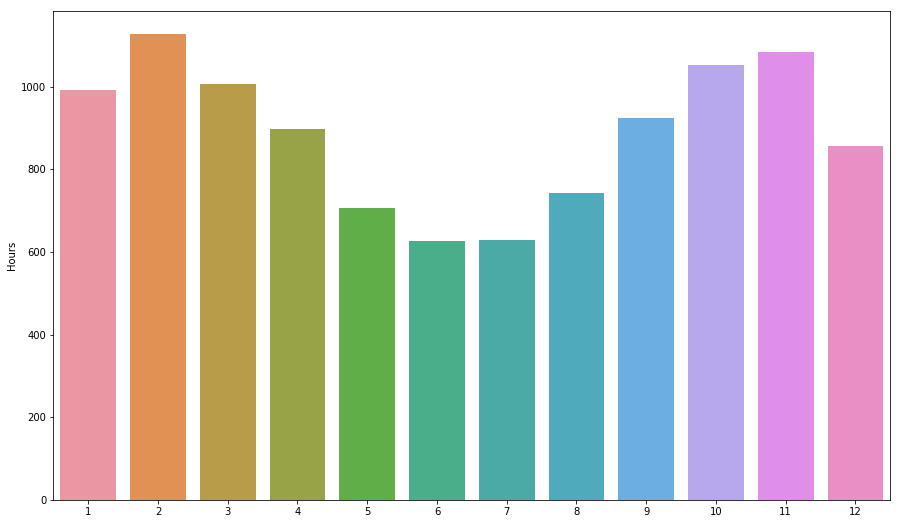

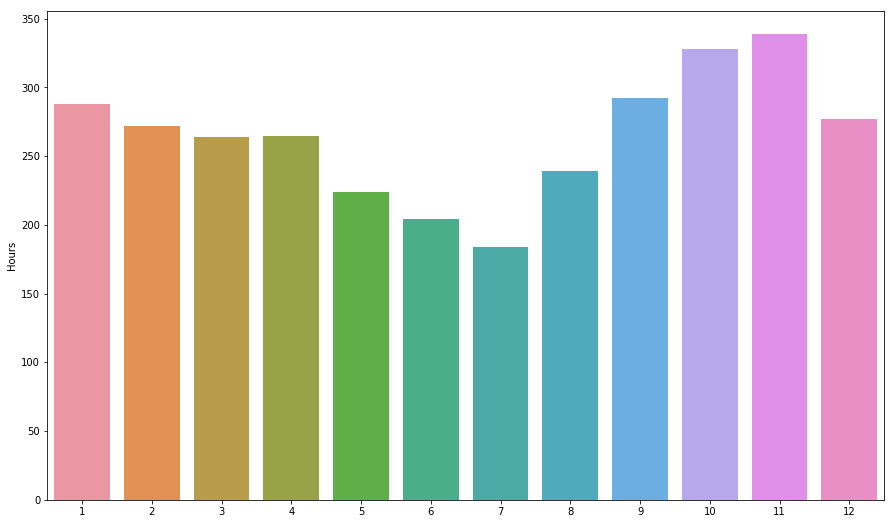

In [486]:
sns.barplot(converted_weekdays['Hours'].value_counts().index,converted_weekdays['Hours'].value_counts())
plt.show()
sns.barplot(converted_weekend['Hours'].value_counts().index,converted_weekend['Hours'].value_counts())

In [496]:
print("Percentage of Trips cancelled on weekdays ",cancelled_time_data_weekday.shape[0]/(converted_weekdays.shape[0]+cancelled_time_data_weekday.shape[0]))
print("Percentage of Trips cancelled on weekends ",cancelled_time_data_weekend.shape[0]/(converted_weekend.shape[0]+cancelled_time_data_weekend.shape[0]))
# print(converted_weekend.shape)

Percentage of Trips cancelled on weekdays  0.11898063875558497
Percentage of Trips cancelled on weekends  0.13836136733586543


In [277]:
cancelled_time_data.head()

,Available Drivers,Cancel Time,Order ID,Placed Time,Reject Time,Response Distance,Response Time,Service Type,Driver Responded in(secs),Customer Cancelled in(secs),Weekday/Weekend,Cancel Hour
8,13,6/8/2018 8:28:04 AM,9,6/8/2018 8:26:34 AM,NaN,9835.0,6/8/2018 8:27:33 AM,Van,59,00:01:30,1,8
13,92,6/8/2018 8:37:35 AM,14,6/8/2018 8:37:15 AM,NaN,2731.0,6/8/2018 8:37:22 AM,Van,7,00:00:20,1,8
28,114,6/8/2018 9:15:32 AM,29,6/8/2018 9:13:42 AM,NaN,557.0,6/8/2018 9:13:51 AM,Van,9,00:01:50,1,9
34,39,6/8/2018 9:35:01 AM,35,6/8/2018 9:34:03 AM,NaN,6411.0,6/8/2018 9:34:53 AM,Van,50,00:00:58,1,9
45,118,6/8/2018 10:03:02 AM,46,6/8/2018 10:02:07 AM,NaN,949.0,6/8/2018 10:02:15 AM,Van,8,00:00:55,1,10


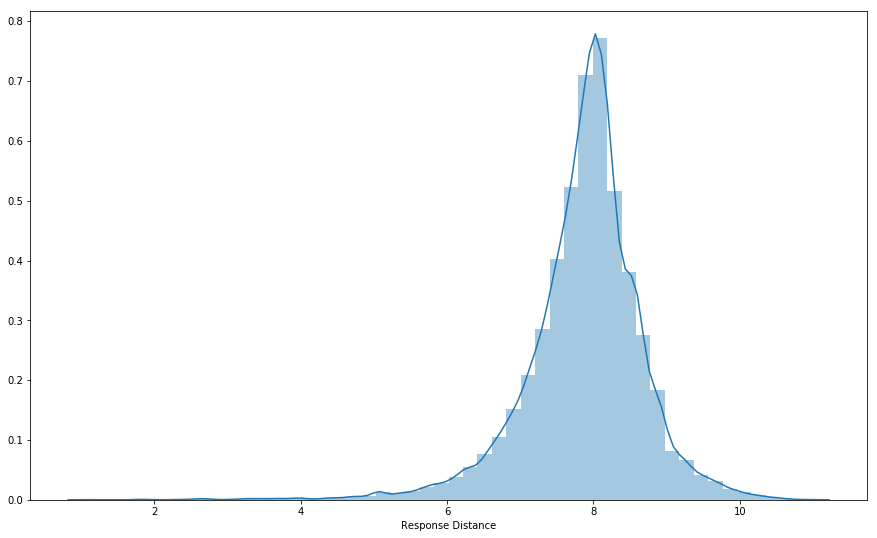

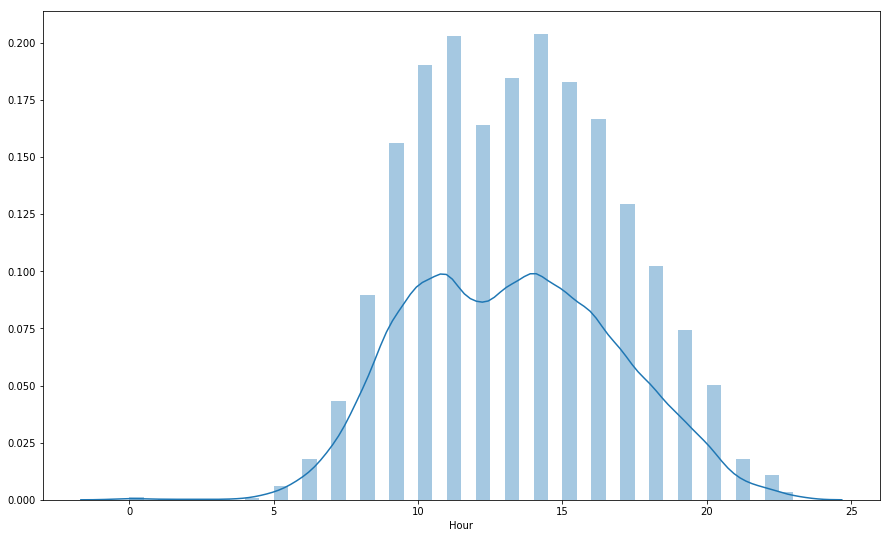

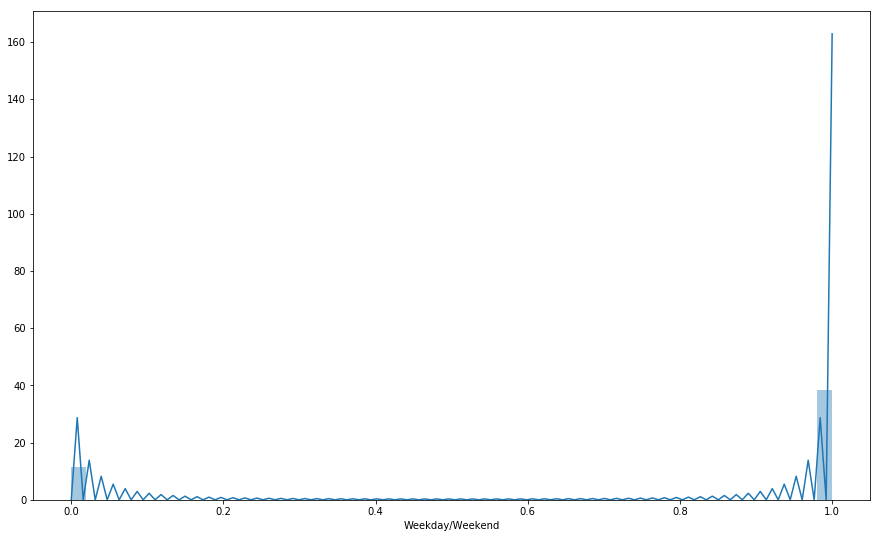

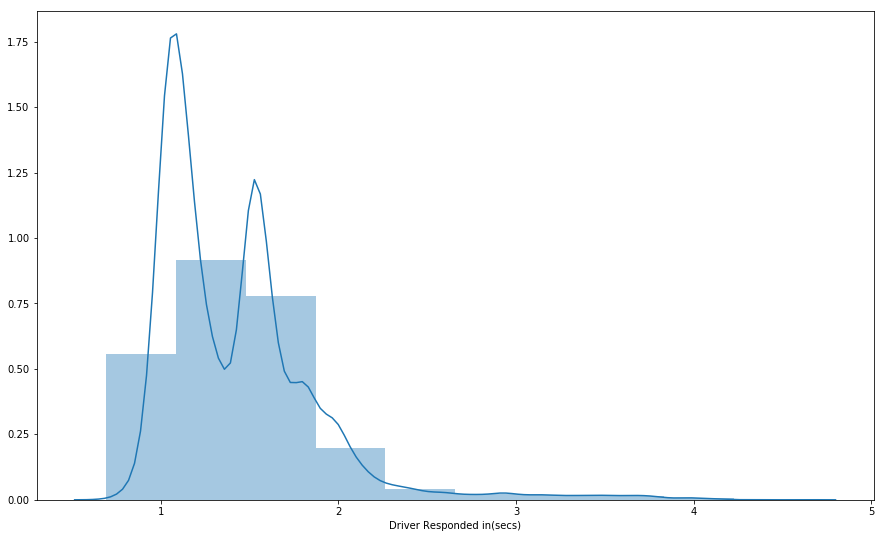

In [364]:
sns.distplot(np.log(fit_data['Response Distance']),hist=True)
plt.show()
sns.distplot(fit_data['Hour'])
plt.show()
sns.distplot(fit_data['Weekday/Weekend'])
plt.show()
sns.distplot(np.log(np.sqrt(fit_data['Driver Responded in(secs)'])),bins=10)

In [253]:
# Using One Class SVM to predit Results 
oneclass = OneClassSVM(nu=0.3,gamma='scale',degree=3,tol=0.01)

oneclass.fit(converted_trips_log)
print('The model fitted to the Converted Trips')
print(pd.DataFrame(oneclass.predict(converted_trips_log),columns=['Predicted Data'])["Predicted Data"].value_counts())
print('The model prediction to the Rejected Trips')
print(pd.DataFrame(oneclass.predict(reject_time_data_log),columns=['Predicted Data'])["Predicted Data"].value_counts())
print('The model prediction to the Cancelled Trips')
print(pd.DataFrame(oneclass.predict(cancelled_time_data_log),columns=['Predicted Data'])["Predicted Data"].value_counts())

The model fitted to the Converted Trips
 1    9588
-1    4110
Name: Predicted Data, dtype: int64
The model prediction to the Rejected Trips
 1    382
-1    236
Name: Predicted Data, dtype: int64
The model prediction to the Cancelled Trips
 1    792
-1    450
Name: Predicted Data, dtype: int64


In [257]:
#Applying PCA to find unsupervised patterns
from sklearn.decomposition import PCA
num_of_components = 3
pca = PCA(n_components=num_of_components)
converted_trips_pca = pca.fit_transform(converted_trips)
print('The explained variance of the {} is {}'.format(num_of_components,pca.explained_variance_ratio_))

The explained variance of the 3 is [9.94286089e-01 4.74103152e-03 6.37603800e-04]


In [235]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=3)
converted_trips_pca = pca.fit_transform(converted_trips)

In [246]:
converted_trips_pca.shape

(13698, 3)

In [254]:
converted_trips = conv_trips.copy()

In [204]:
converted_trips_log = np.log(converted_trips)
cancelled_time_data_log = np.log(cancelled_time_data.drop(['Cancel in(secs)','Placed Hour'],axis=1))
reject_time_data_log = np.log(reject_time_data.drop(['Cancel in(secs)','Placed Hour'],axis=1))

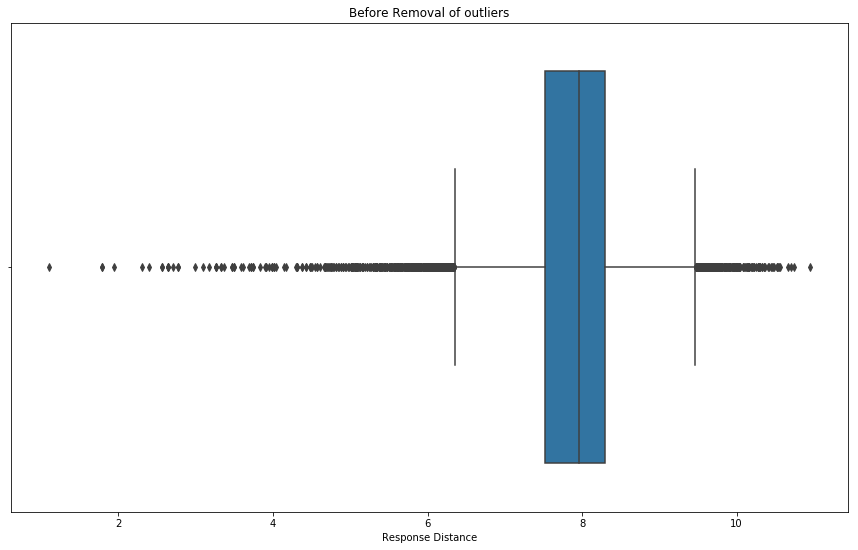

Text(0.5,1,'After removal of outliers')

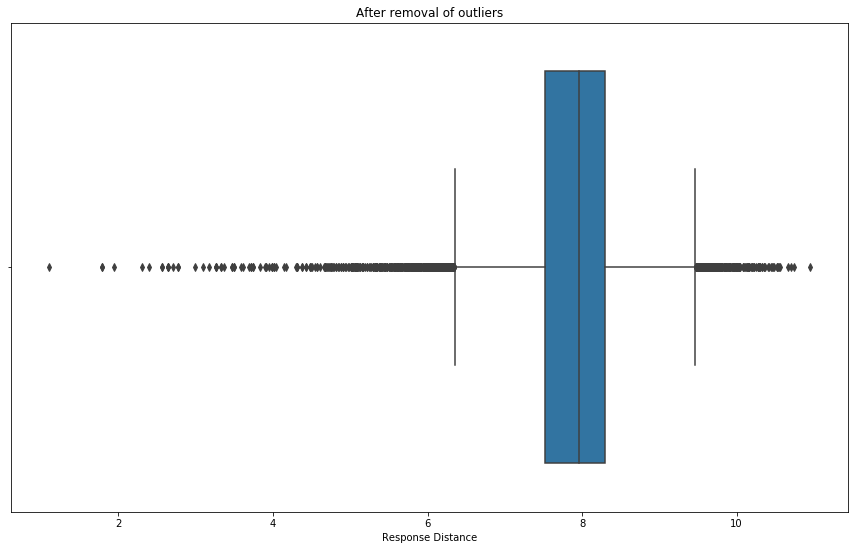

In [205]:
columns = 'Response Distance'
# converted_trips_log = converted_trips
sns.boxplot((converted_trips_log[columns]))
plt.title('Before Removal of outliers')
# converted_trips_log=converted_trips_log[(converted_trips_log[columns]>6.3) & (converted_trips_log[columns]>9.5) ]
plt.show()
sns.boxplot((converted_trips_log[columns]))
plt.title("After removal of outliers")
# plt.axvline(9.5)
# plt.axvline(6.3)

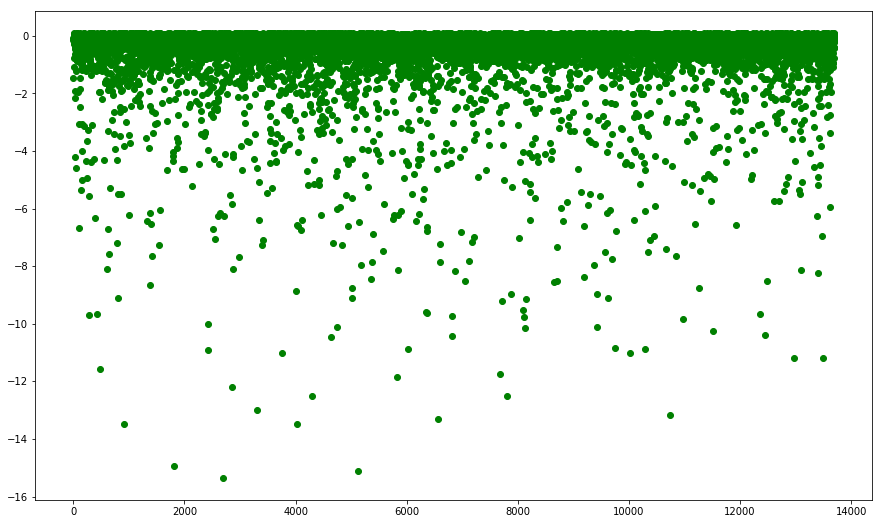

In [150]:
plt.plot(oneclass.decision_function(converted_trips_log),'go')

In [238]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_jobs=-1,n_estimators=150,contamination=0.12,behaviour='new')
model.fit(converted_trips_pca)
pd.DataFrame(model.predict(converted_trips_pca),columns=['Predicted Data'])["Predicted Data"].value_counts()

 1    12054
-1     1644
Name: Predicted Data, dtype: int64

In [249]:
converted_trips_pca.shape
converted_trips.shape

(13698, 4)

In [267]:
[2]*10

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [73]:
converted_trips['Labels'] = np.zeros(converted_trips.shape[0])
cancelled_time_data['Labels']= np.ones(cancelled_time_data.shape[0])
reject_time_data['Labels'] = np.ones(reject_time_data.shape[0])

In [74]:
final_df=pd.concat((converted_trips,cancelled_time_data[converted_trips.columns],reject_time_data[converted_trips.columns]),axis=0)

In [66]:
def scatterplot(Xdf,Ydf,algoname):
    tempDf = pd.DataFrame(Xdf.iloc[:,0:2],index=Xdf.index)
    tempDf = pd.concat((tempDf,Ydf),axis=1)
    print(tempDf.shape)
    tempDf.columns = ["First Vector","Second Vector",'Labels']
    sns.lmplot(x="First Vector",y="Second Vector",hue="Labels",data=tempDf)
#     sns.set(rc={'figure.figsize':(20,15)})
    ax = plt.gca()
    ax.set_title("Separation of observation using algo " + algoname)
    plt.axis([0,5000,0,5000])
#     plt.figure(figsize=(15,9))
# plt.scatter(converted_trips_pca[:][1],np.ones(converted_trips.shape[0]))

In [54]:
from sklearn.manifold import TSNE

In [55]:
from sklearn.decomposition import *
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
pca.fit(final_df.drop('Labels',axis=1))
# kpca = KernelPCA(n_components=2)
# kpca.fit(final_df.drop('Labels',axis=1))
# spca = SparsePCA(n_components=2)
# spca.fit(final_df.drop('Labels',axis=1))
tsne = TSNE()
# tsne.fit(final_df.drop('Labels',axis=1))
# gaus_proj = GaussianRandomProjection(eps=1)
# gaus_proj.fit(final_df.drop('Labels',axis=1))
# isomap = Isomap(n_neighbors=10,n_jobs=-1)
# isomap.fit(final_df.drop('Labels',axis=1))

In [67]:
final_df_pca=pd.DataFrame(pca.transform(final_df.drop('Labels',axis=1)),index=final_df.index)
# final_df_kpca=pd.DataFrame(kpca.transform(final_df.drop('Labels',axis=1)),index=final_df.index)
# final_df_spca=pd.DataFrame(spca.transform(final_df.drop('Labels',axis=1)),index=final_df.index)
# # final_df_gaus_proj=pd.DataFrame(gaus_proj.transform(final_df.drop('Labels',axis=1)),index=final_df.index)
# # final_df_isomap=pd.DataFrame(isomap.transform(final_df.drop('Labels',axis=1)),index=final_df.index)
final_df_tsne=pd.DataFrame(tsne.fit_transform(final_df.drop('Labels',axis=1)),index=final_df.index)

(15558, 3)
(15558, 3)


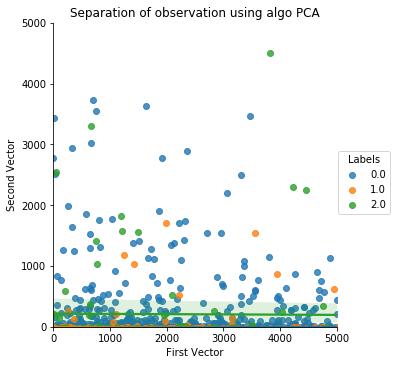

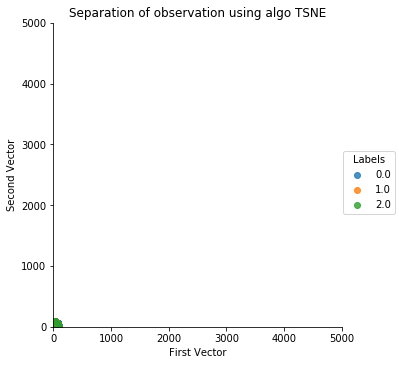

In [68]:
scatterplot(final_df_pca,final_df['Labels'],'PCA')
# scatterplot(final_df_kpca,final_df['Labels'],'KPCA')
# scatterplot(final_df_spca,final_df['Labels'],'SparsePCA')
# # scatterplot(final_df_pca,final_df['Labels'],'Gaussian Projection')
# scatterplot(final_df_isomap,final_df['Labels'],'isomap')
scatterplot(final_df_tsne,final_df['Labels'],'TSNE')

In [ ]:
scatterplot(final_df_tsne,final_df['Labels'],'TSNE')

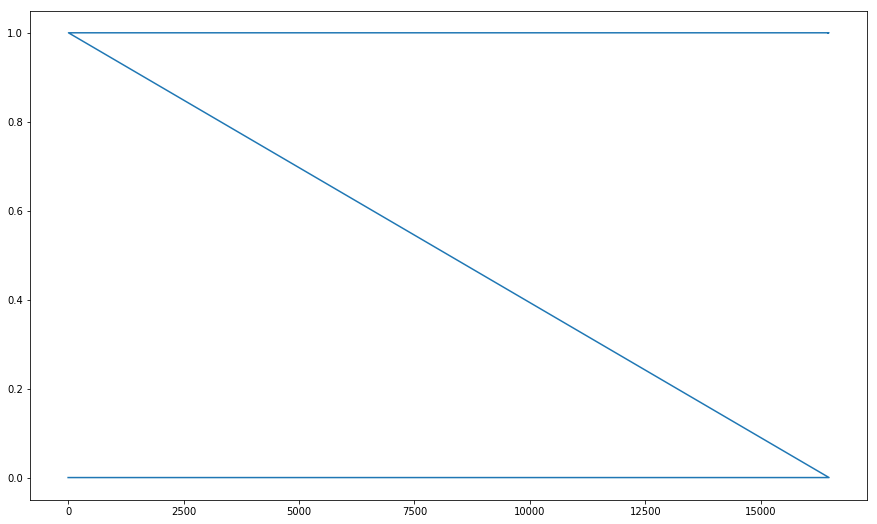

In [75]:
plt.plot(final_df["Labels"])

In [168]:
final_df_pca['Labels'] = final_df['Labels']
final_df_tsne['Labels'] = final_df['Labels']
final_df_tsne.head()

,0,1,Labels
0,-13.997287,36.785534,0.0
1,-17.046562,50.834568,0.0
2,-81.102486,54.412556,0.0
3,-37.634907,-71.112503,0.0
4,-59.960075,44.218258,0.0


In [235]:
def train_model(df,model,train_size,name_of_algo):
    X_train,X_test,y_train,y_test=train_test_split(df.drop('Labels',axis=1),df['Labels'],train_size=train_size,stratify=final_df_pca['Labels'],random_state=42)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    print("Classification report with trained set size {} % of dataset and applying {} is".format(train_size*100,name_of_algo))
    print(classification_report(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))
#     roc_curve(y_test,model.predict_proba(y_test[[0,1]])[:,1].reshape(-1,1),sample_weight="balanced")

In [250]:
final_df.head()

,Available Drivers,Response Distance,Motorcycle,Van,Response in(secs),Placed Hour,Weekday/Weekend,Driver Reaction Time,Labels
0,39,4615.0,0,1,24,8,1,0.615385,0.0
1,68,4785.0,0,1,33,8,1,0.485294,0.0
2,10,15964.0,0,1,26,8,1,2.600000,0.0
3,76,2459.0,0,1,9,8,1,0.118421,0.0
4,98,5510.0,0,1,21,8,1,0.214286,0.0


In [262]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
prep_data=pd.DataFrame(std_scaler.fit_transform(final_df.drop('Labels',axis=1)),index = final_df.index,columns=final_df.columns[:-1])
prep_data['Labels']= final_df['Labels']

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.svm import SVC
#X_train,y_train,X_test,y_test = 
df = final_df_pca
train_size = 0.8
logreg = LogisticRegression(class_weight="balanced",n_jobs=-1)
train_model(prep_data,logreg,train_size,name_of_algo="logistic regression")
# svc = SVC(class_weight="balanced",C=0.8)
# train_model(df,svc,train_size,name_of_algo= "Svm")
# X_train,X_test,y_train,y_test=train_test_split(df.drop('Labels',axis=1),df['Labels'],train_size=train_size,stratify=final_df_pca['Labels'])
# svc = SVC(class_weight="balanced")
# svc.fit(X_train,y_train)

# y_pred = svc.predict(X_test)
# print("Classification report with trained set size {} % of dataset and applying PCA is".format(train_size*100))
# print(classification_report(y_test,y_pred))

Classification report with trained set size 80.0 % of dataset and applying logistic regression is
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2740
         1.0       0.20      0.39      0.26       372

    accuracy                           0.73      3112
   macro avg       0.55      0.59      0.55      3112
weighted avg       0.82      0.73      0.77      3112

0.5865650262930696


C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [33]:
#The mean of the different features according to different time of the day for Converted Trips
converted_trips.groupby('Placed Hour').mean()

,Available Drivers,Order ID,Response Distance,Motorcycle,Van,Response in(secs),Weekday/Weekend,Driver Reaction Time
Placed Hour,,,,,,,,
0,236.444444,10317.555556,4497.777778,0.000000,1.000000,24.777778,0.444444,0.139905
1,109.000000,1918.333333,8405.333333,0.000000,1.000000,90.000000,0.666667,1.220232
2,229.666667,10142.666667,7006.666667,0.333333,0.666667,122.000000,0.000000,3.089017
3,88.500000,4191.500000,14892.000000,0.000000,1.000000,43.000000,0.500000,0.909259
4,204.500000,8227.333333,3727.000000,0.166667,0.833333,133.666667,0.833333,0.880811
5,92.275000,9290.600000,5629.025000,0.025000,0.975000,333.450000,0.950000,4.622133
6,98.524590,9374.368852,4848.827869,0.073770,0.926230,57.885246,0.868852,6.069294
7,97.648649,8878.216216,4220.665541,0.070946,0.929054,68.236486,0.834459,3.220501
8,101.394137,7896.013029,3419.394137,0.060261,0.939739,46.570033,0.780130,9.660133


In [32]:
#The mean of the different features according to different time of the day for Rejected Data. There is a difference from the
# mean of the data of the Converted Trips.thereby believing the features that have been finally selected stands good
reject_time_data.groupby('Placed Hour').mean()

,Available Drivers,Order ID,Response Distance,Motorcycle,Van,Response in(secs),Cancel in(secs),Weekday/Weekend,Driver Reaction Time
Placed Hour,,,,,,,,,
1,264.666667,7919.000000,5048.666667,0.000000,1.000000,28.333333,30211.000000,0.666667,0.141023
4,217.000000,7369.000000,4964.000000,0.000000,1.000000,1891.000000,7818.000000,0.000000,8.714286
5,170.000000,12521.000000,3876.000000,0.000000,1.000000,207.000000,3933.000000,1.000000,1.217647
6,94.333333,9236.166667,5798.666667,0.500000,0.500000,70.333333,1255.166667,0.833333,6.356799
7,90.285714,7787.857143,4230.785714,0.142857,0.857143,45.928571,7967.785714,0.642857,2.695354
8,103.750000,8748.687500,4408.687500,0.187500,0.812500,279.125000,11716.812500,0.812500,110.855446
9,101.410256,7726.564103,5376.435897,0.102564,0.897436,164.282051,9133.692308,0.641026,84.318166
10,103.754717,7477.320755,4386.830189,0.169811,0.830189,150.301887,9517.264151,0.830189,19.543746
11,103.773585,7706.415094,4168.792453,0.226415,0.773585,93.962264,9942.377358,0.735849,5.808455


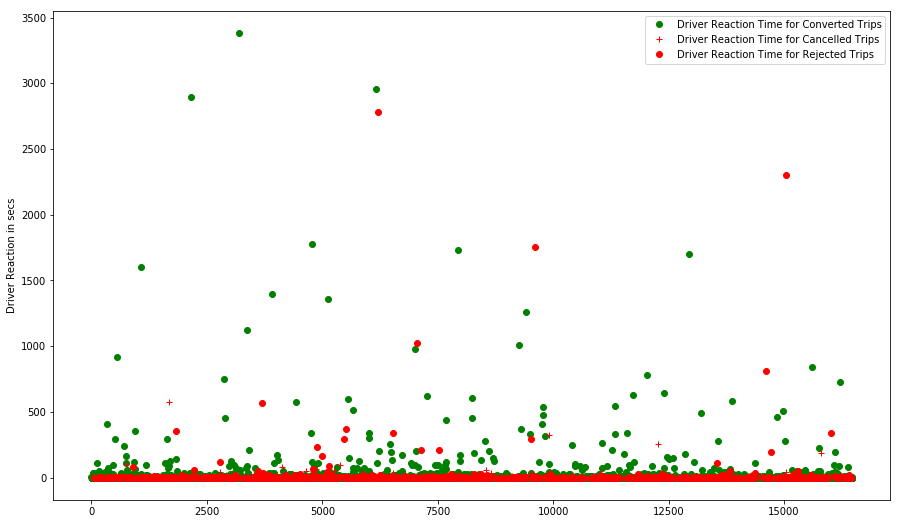

Text(0,0.5,'Distance between Requested User and Driver')

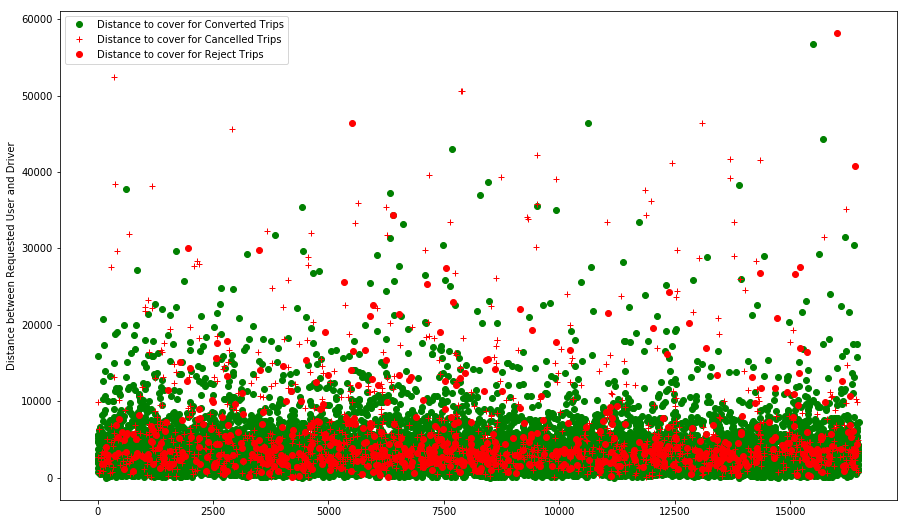

In [30]:
plt.plot(converted_trips['Driver Reaction Time'],'go',label="Driver Reaction Time for Converted Trips")
plt.plot(cancelled_time_data['Driver Reaction Time'],'r+',label="Driver Reaction Time for Cancelled Trips")
plt.plot(reject_time_data['Driver Reaction Time'],'ro',label="Driver Reaction Time for Rejected Trips")
plt.legend()
plt.ylabel("Driver Reaction in secs")
# plt.axis([0,15000,0,5])
plt.show()
plt.plot(converted_trips['Response Distance'],'go',label="Distance to cover for Converted Trips")
plt.plot(cancelled_time_data['Response Distance'],'r+',label="Distance to cover for Cancelled Trips")
plt.plot(reject_time_data['Response Distance'],'ro',label="Distance to cover for Reject Trips")
plt.legend()
plt.ylabel("Distance between Requested User and Driver")
# plt.axis([0,15000,0,5])